# AutoGluon Implementation
This Notebook outlines the implementation of AutoGluon for the Bitcoin Price prediction. As this was not used for the final Ensemble model, this was merely tested initially as an alternative.
Main Resources:
* [Implementation ](https://www.kdnuggets.com/getting-started-with-autogluon-your-first-steps-in-automated-machine-learning)
* [Documentation](https://auto.gluon.ai/stable/index.html)

In [ ]:
#uncomment as needed
#!pip install autogluon
#!pip install codecarbon

# Initial Testing
First, AutoGluon was implemented with a simple 80/20 split, limited runtime following the example given above to get some initial insights. the code and results are commented below.

```
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
df_1.index = pd.to_datetime(df_1.index)
assert isinstance(df_1.index, pd.DatetimeIndex), "Index must be DatetimeIndex"

assert 'Close_UTC_00' in df_1.columns, "Target column 'Close_UTC_00' missing"


assert not df_1.index.duplicated().any(), "Duplicate timestamps found"
# ensure tabular dataset
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import pandas as pd

data = TabularDataset(df_1)

# Split into train and test sets (80% training, 20% testing)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
```
Training samples: 786

Testing samples: 197

```
# Define target variable (what we want to predict)
target = 'Close_UTC_00'

# Train the model
predictor = TabularPredictor(label=target).fit(
    train_data=train_data,
    time_limit=120,  # 2 minutes for quick results (increase for better accuracy)
    presets='best_quality'  # Options: 'medium_quality', 'high_quality' (faster vs. slower)
)

# Generate predictions
y_pred = predictor.predict(test_data.drop(columns=[target]))

# Evaluate accuracy
performance = predictor.evaluate(test_data)
#print(f"Model Accuracy: {performance['accuracy']:.2f}") #Old Code
print(f"Model RMSE: {performance['root_mean_squared_error']:.2f}") #New Code - prints RMSE instead of accuracy
#print(f"Model Accuracy: {performance['accuracy']:.2f}")
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)
```

```
Model RMSE: -0.01
                   model  score_test  score_val              eval_metric  \
0    WeightedEnsemble_L3   -0.010852  -0.013693  root_mean_squared_error   
1    WeightedEnsemble_L2   -0.010852  -0.013693  root_mean_squared_error   
2      LightGBMXT_BAG_L1   -0.011009  -0.014115  root_mean_squared_error   
3      LightGBMXT_BAG_L2   -0.011099  -0.015300  root_mean_squared_error   
4  KNeighborsDist_BAG_L1   -0.013828  -0.016723  root_mean_squared_error   
5  KNeighborsUnif_BAG_L1   -0.015818  -0.019038  root_mean_squared_error   

   pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  \
0        0.805561       0.549178  46.285536                 0.002475   
1        0.806183       0.549363  46.288396                 0.003098   
2        0.798815       0.535894  46.256757                 0.798815   
3        0.945191       0.781990  78.190883                 0.142106   
4        0.004270       0.012671   0.020465                 0.004270   
5        0.004364       0.046272   0.005778                 0.004364   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000613           0.008314            3       True   
1                0.000798           0.011174            2       True   
2                0.535894          46.256757            1       True   
3                0.233425          31.913661            2       True   
4                0.012671           0.020465            1       True   
5                0.046272           0.005778            1       True   

   fit_order  
0          6  
1          4  
2          3  
3          5  
4          2  
5          1  
```

Due to the nature and format that AutoGluon requires data, the design of this notebook differs slightly from the other implementations. However, the following measures were ensured for comparability:
*  5-Fold CV using TimeSeriesSplit
*  MAE, RMSE and sMAPE were evaluated using sklearn
*  Hyperparameter tuning- done by setting the hyper_parameters to deafult and best quality.


In [ ]:
T#imports
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(
    output_file = "emissions_autogluon.csv",
    project_name = "autogluon_emissions"
)
tracker.start()
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
from numpy import array
import sys
import gc
gc.enable()
import os
import zipfile
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from autogluon.tabular import TabularDataset, TabularPredictor

[codecarbon WARNING @ 00:16:15] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:16:15] [setup] RAM Tracking...
[codecarbon INFO @ 00:16:15] [setup] CPU Tracking...
[codecarbon WARNING @ 00:16:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 00:16:16] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 00:16:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 00:16:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:16:16] [setup] GPU Tracking...
[codecarbon INFO @ 00:16:16] No GPU found.
[codecarbon INFO @ 00:16:16] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [ ]:
drive.mount('/content/drive', force_remount = True)
file_path = '/content/drive/My Drive/FILE_PATH' #Replace FILE_PATH with the actual file destination or upload directly to notebook
#reading
df_1 = pd.read_csv(file_path + 'feature_engineered_data_1.csv', infer_datetime_format=True)
df_2 = pd.read_csv(file_path + 'feature_engineered_data_2.csv',infer_datetime_format=True)

Mounted at /content/drive


<ipython-input-3-9968560cba89>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_1 = pd.read_csv(file_path + 'feature_engineered_data_1.csv', infer_datetime_format=True)
<ipython-input-3-9968560cba89>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_2 = pd.read_csv(file_path + 'feature_engineered_data_2.csv',infer_datetime_format=True)


In [ ]:
df_1.head()

,Time_UTC,Close_Avg,Close_UTC_00,Close_ET_4pm,Close Value Apple,Close Value SPDR S&P 500 ETF Trust,Close Value Coinbase,RSI,Close_UTC_00_lag1,Close_UTC_00_lag3,Close_UTC_00_lag7,RSI_lag1,RSI_lag3,RSI_lag7,YEAR,MONTH,DAY
0,2022-01-08,0.457446,0.448601,0.450442,0.429417,0.525828,0.808318,0.172559,0.476972,0.517471,0.533485,0.220912,0.345547,0.000000,2022,1,8
1,2022-01-09,0.456446,0.429663,0.451505,0.429417,0.525828,0.808318,0.150561,0.448601,0.521923,0.551399,0.172559,0.397311,1.000000,2022,1,9
2,2022-01-10,0.457169,0.453001,0.438294,0.429599,0.523044,0.778704,0.265888,0.429663,0.476972,0.541158,0.150561,0.220912,0.636253,2022,1,10
3,2022-01-11,0.460943,0.445929,0.453174,0.455920,0.543399,0.828141,0.255382,0.453001,0.448601,0.531334,0.265888,0.172559,0.471683,2022,1,11
4,2022-01-12,0.478779,0.466867,0.486503,0.460018,0.549496,0.817906,0.333373,0.445929,0.429663,0.517471,0.255382,0.150561,0.345547,2022,1,12


In [ ]:
#starting wityh df_1
df = df_1.copy()
#removing year for consistency
df.drop(columns=['YEAR', 'Close_Avg', 'Close_ET_4pm'], inplace=True)
df.index = pd.to_datetime(df.index)
target = 'Close_UTC_00'

In [ ]:
#sMAPE
def smape_calc(y_true, y_pred):
  """
  Calculates the Symmetric Mean Absolute Percentage Error (sMAPE).
  Handles cases where the denominator is zero by replacing it with zero
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  #what to do if denom = 0 - very unlikely
  denom = (np.abs(y_true) + np.abs(y_pred)) / 2
  numer = np.abs(y_true - y_pred)


  #handling unlikely rare cases where true and predicted are 0
  with np.errstate(divide='ignore', invalid='ignore'):
    smape = np.where(denom == 0, 0.0, numer / denom )

  return np.mean(smape) *100

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_001955"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.12 GB / 12.67 GB (87.7%)
Disk Space Avail:   62.16 GB / 107.72 GB (57.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

(_ray_fit pid=22822) [1000]	valid_set's rmse: 0.018943


[codecarbon INFO @ 00:20:32] Energy consumed for RAM : 0.000711 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:20:32] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:20:32] Energy consumed for All CPU : 0.003023 kWh
[codecarbon INFO @ 00:20:32] 0.003734 kWh of electricity used since the beginning.


(_ray_fit pid=22982) [1000]	valid_set's rmse: 0.0286704 [repeated 12x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_ray_fit pid=22982) 	Ran out of time, early stopping on iteration 8652. Best iteration is:
(_ray_fit pid=22982) 	[8547]	valid_set's rmse: 0.0269708
[codecarbon INFO @ 00:20:47] Energy consumed for RAM : 0.000753 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:20:47] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:20:47] Energy consumed for All CPU : 0.003200 kWh
[codecarbon INFO @ 00:20:47] 0.003953 kWh of electricity used since the beginning.


(_ray_fit pid=23127) [1000]	valid_set's rmse: 0.0205687 [repeated 8x across cluster]


[codecarbon INFO @ 00:21:02] Energy consumed for RAM : 0.000794 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:21:02] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:21:02] Energy consumed for All CPU : 0.003377 kWh
[codecarbon INFO @ 00:21:02] 0.004172 kWh of electricity used since the beginning.


(_ray_fit pid=23314) [1000]	valid_set's rmse: 0.0156881 [repeated 3x across cluster]


(_ray_fit pid=23314) 	Ran out of time, early stopping on iteration 6622. Best iteration is:
(_ray_fit pid=23314) 	[6565]	valid_set's rmse: 0.0124314
[codecarbon INFO @ 00:21:17] Energy consumed for RAM : 0.000836 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:21:17] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:21:17] Energy consumed for All CPU : 0.003554 kWh
[codecarbon INFO @ 00:21:17] 0.004390 kWh of electricity used since the beginning.
(_dystack pid=22618) 	-0.0209	 = Validation score   (-root_mean_squared_error)
(_dystack pid=22618) 	61.17s	 = Training   runtime
(_dystack pid=22618) 	0.11s	 = Validation runtime
(_dystack pid=22618) Fitting model: WeightedEnsemble_L2 ... Training model for up to 52.69s of the -20.74s of remaining time.
(_dystack pid=22618) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 0.727, 'LightGBMXT_BAG_L1': 0.273}
(_dystack pid=22618) 	-0.0174	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2261

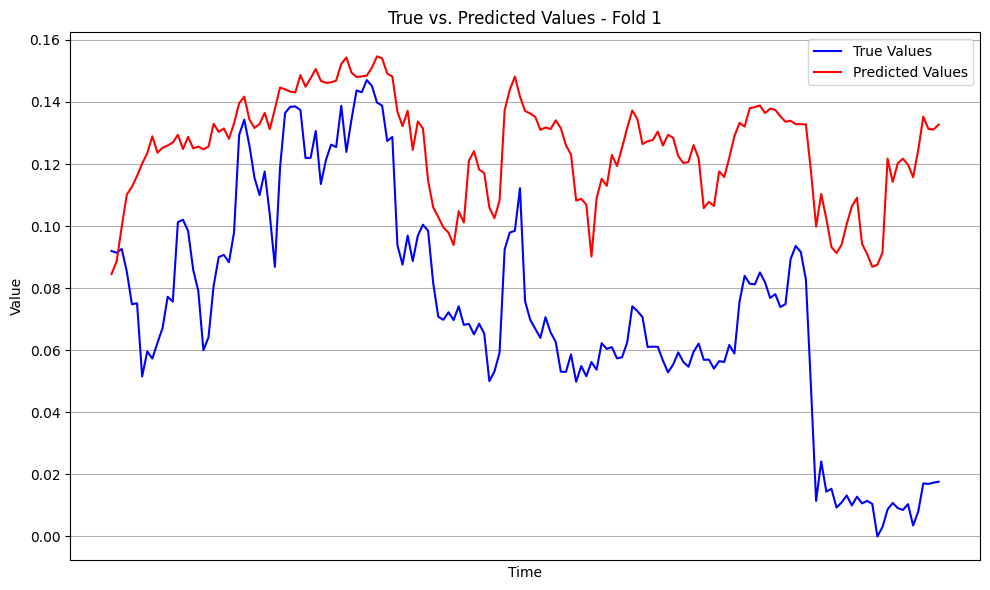

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_002405"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.49 GB / 12.67 GB (82.8%)
Disk Space Avail:   62.11 GB / 107.72 GB (57.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

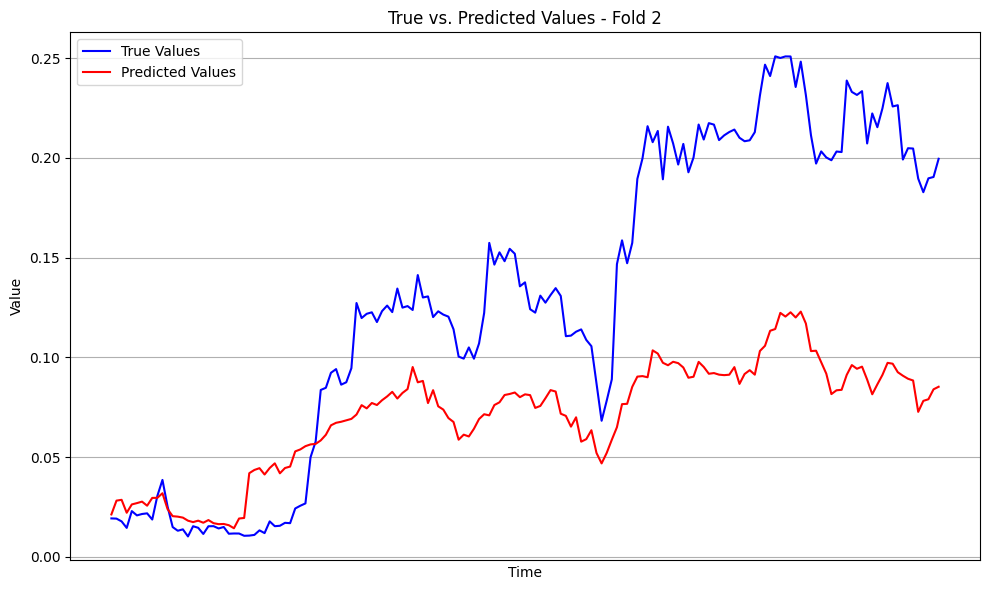

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_002808"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.27 GB / 12.67 GB (81.1%)
Disk Space Avail:   62.06 GB / 107.72 GB (57.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

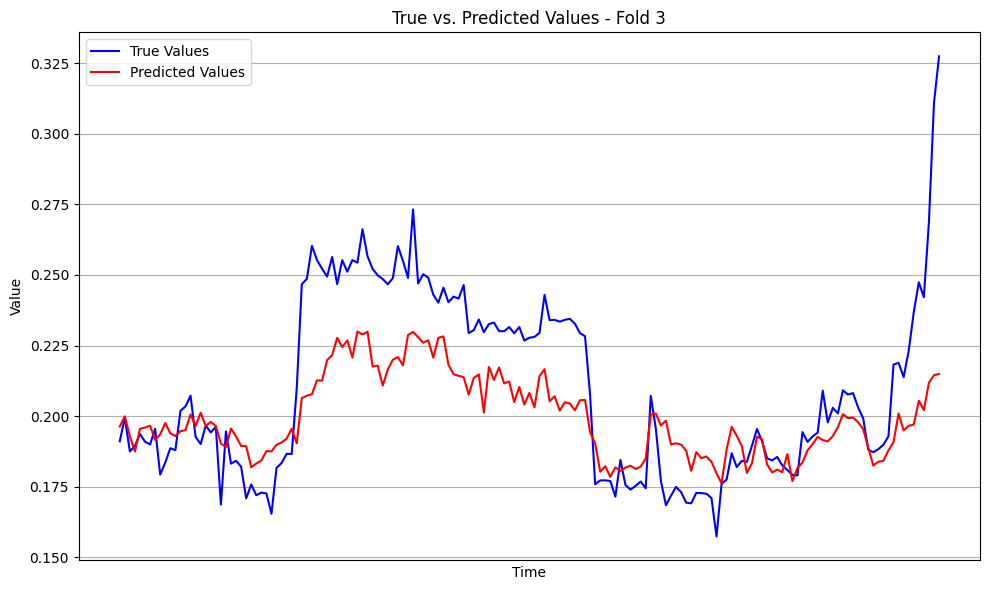

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_003221"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.91 GB / 12.67 GB (86.1%)
Disk Space Avail:   61.99 GB / 107.72 GB (57.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

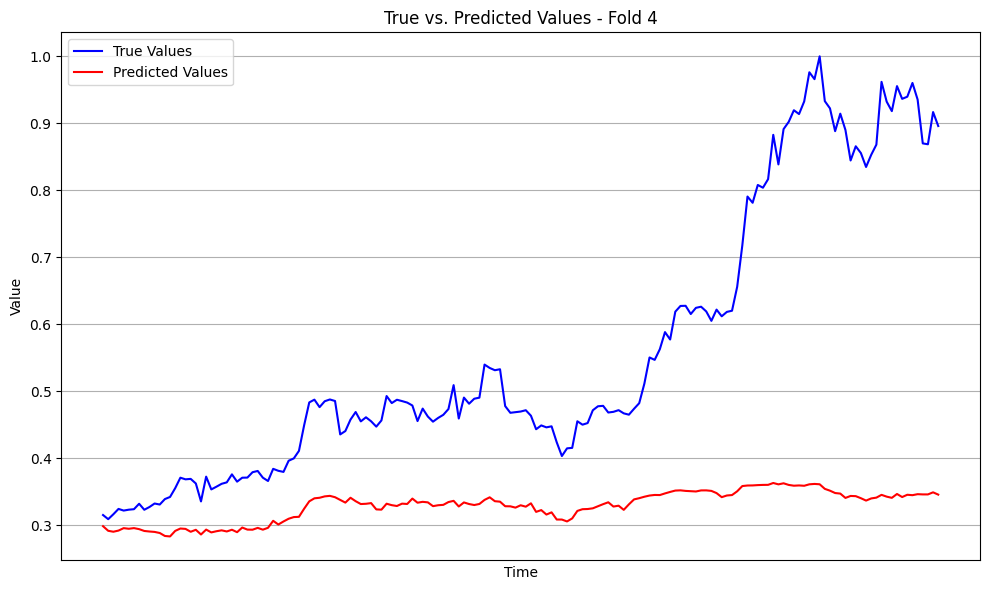

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_003627"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.67 GB / 12.67 GB (84.2%)
Disk Space Avail:   61.91 GB / 107.72 GB (57.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

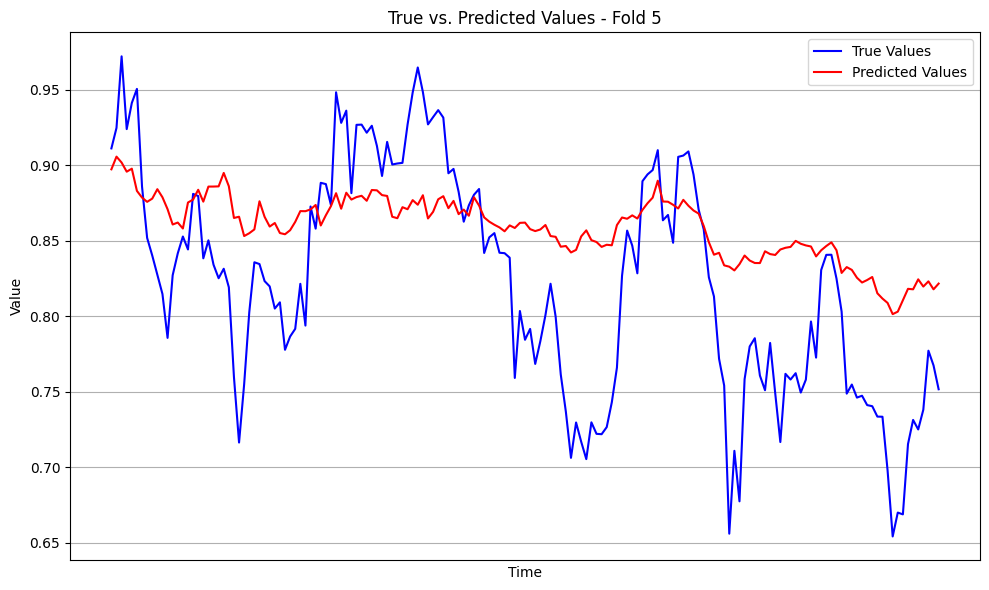

<Figure size 640x480 with 0 Axes>

In [ ]:
#create rolling CV for tabular dataset
tscv = TimeSeriesSplit(n_splits=5)
#metrics to eval
mae_list, rsme_list, smape_list = [], [], []

#initialising first fold
fold = 1
for train_index, test_index in tscv.split(df):
  train_df, test_df = df.iloc[train_index], df.iloc[test_index]
  train_tabular_df = TabularDataset(train_df)
  test_tabular_df = TabularDataset(test_df)

  predictor = TabularPredictor(label=target).fit(
      train_data=train_tabular_df,
      time_limit=240,  # 4 minutes to match lin reg time
      presets='best_quality',
      hyperparameters='default'

  )

  y_true = test_tabular_df[target]
  y_pred = predictor.predict(test_tabular_df)

  #metrics
  mae = mean_absolute_error(y_true, y_pred)
  rsme = np.sqrt(mean_squared_error(y_true, y_pred))
  smape = smape_calc(y_true, y_pred)

  #add to list
  mae_list.append(mae)
  rsme_list.append(rsme)
  smape_list.append(smape)

  #create plot
  plt.figure(figsize=(10, 6))
  plt.plot(y_true, label='True Values', color='blue')
  plt.plot(y_pred, label='Predicted Values', color='red')
  plt.title(f'True vs. Predicted Values - Fold {fold}')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
  plt.savefig(f'autogluon_fold_{fold}_df_1.png')

  fold += 1 #do for each fold

In [ ]:
#get results and save
results = pd.DataFrame({
    'Fold': range(1, len(mae_list) + 1),
    'MAE': mae_list,
    'RMSE': rsme_list,
    'sMAPE': smape_list
})
#save
results.to_csv('autogluon_results_df_1.csv', index=False)

In [ ]:
#save best model and leaderboard
best_model_name = predictor.model_best
print(f"Best Model Found by AutoGluon after 4 minutes: {best_model_name}")

#save
with open('autogluon_best_model.txt', 'w') as f:
  f.write(f"Best Model: {best_model_name}\n")

#also save leaderboard
leaderboard = predictor.leaderboard(test_tabular_df, silent=True)
leaderboard.to_csv('autogluon_leaderboard.csv', index=False)

Best Model Found by AutoGluon after 4 minutes: WeightedEnsemble_L2


[codecarbon INFO @ 00:43:18] Energy consumed for RAM : 0.004501 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:43:18] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:43:18] Energy consumed for All CPU : 0.019134 kWh
[codecarbon INFO @ 00:43:18] 0.023635 kWh of electricity used since the beginning.


# Dataset 2

In [ ]:
#now df_2
gc.collect()
df = df_2.copy()
#removing year for consistency
df.drop(columns=['YEAR', 'Close_Avg', 'Close_ET_4pm'], inplace=True)
df.index = pd.to_datetime(df.index)
target = 'Close_UTC_00'

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_004331"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.40 GB / 12.67 GB (82.1%)
Disk Space Avail:   61.76 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

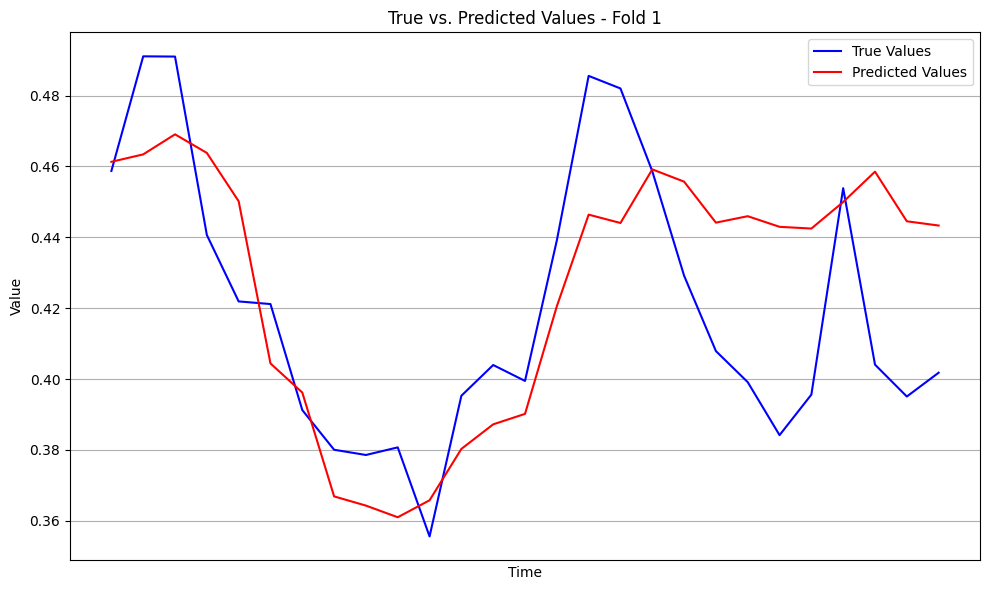

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_004740"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.26 GB / 12.67 GB (81.0%)
Disk Space Avail:   61.75 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

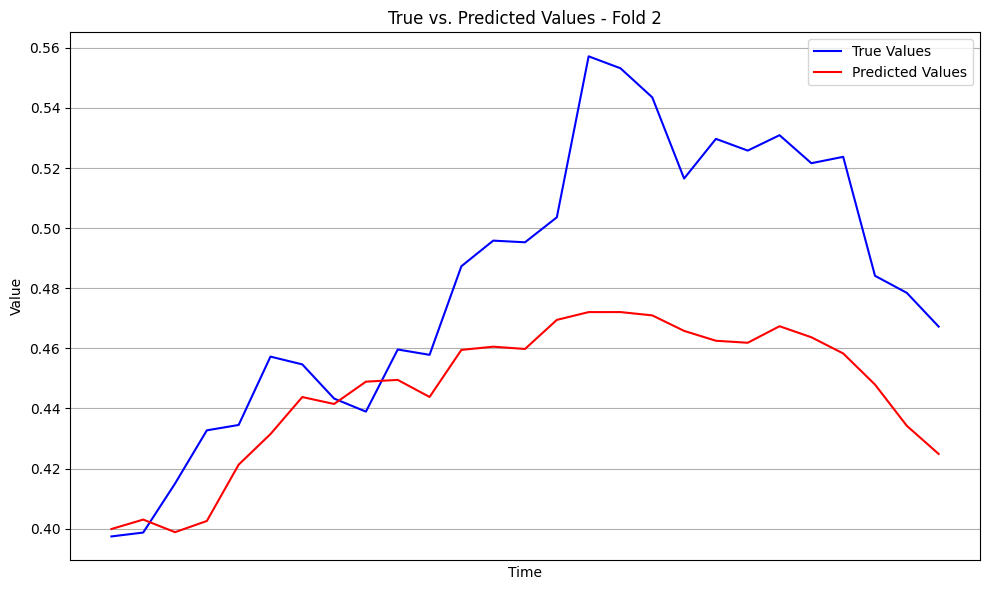

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_005158"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.27 GB / 12.67 GB (81.0%)
Disk Space Avail:   61.73 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

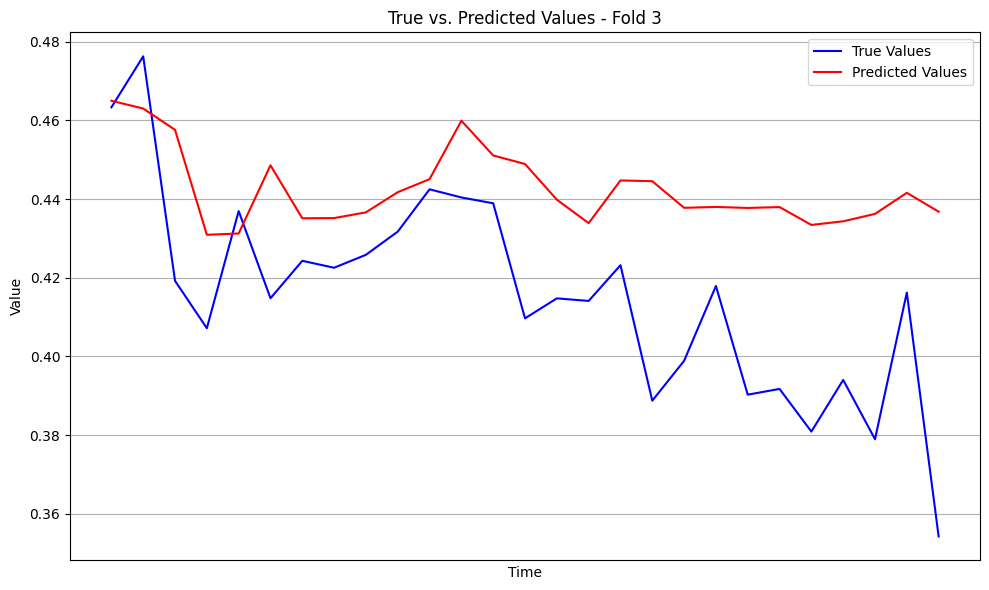

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_005605"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.01 GB / 12.67 GB (79.0%)
Disk Space Avail:   61.71 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

<Figure size 640x480 with 0 Axes>

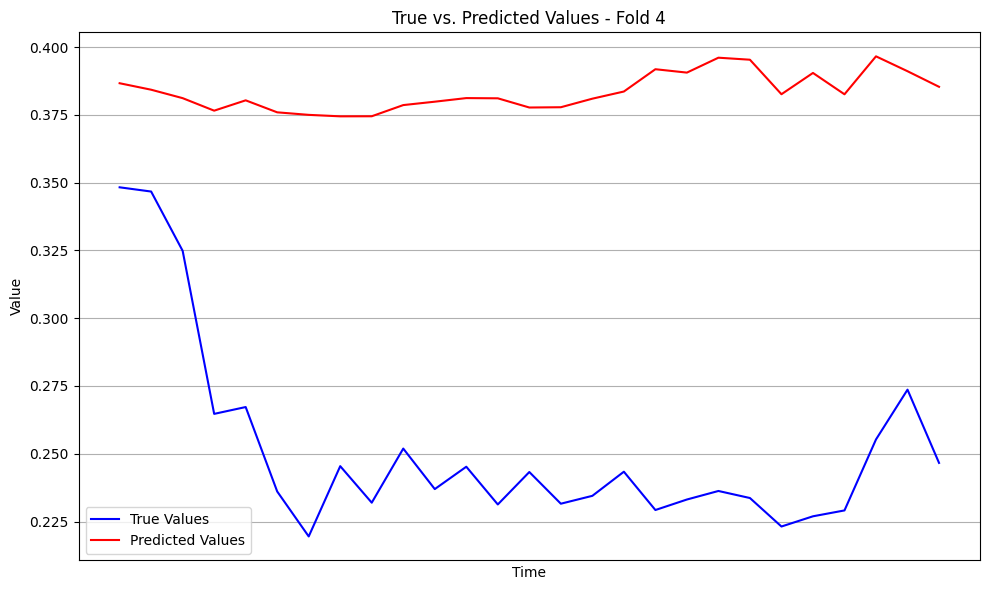

No path specified. Models will be saved in: "AutogluonModels/ag-20250419_010011"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.74 GB / 12.67 GB (76.9%)
Disk Space Avail:   61.69 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

<Figure size 640x480 with 0 Axes>

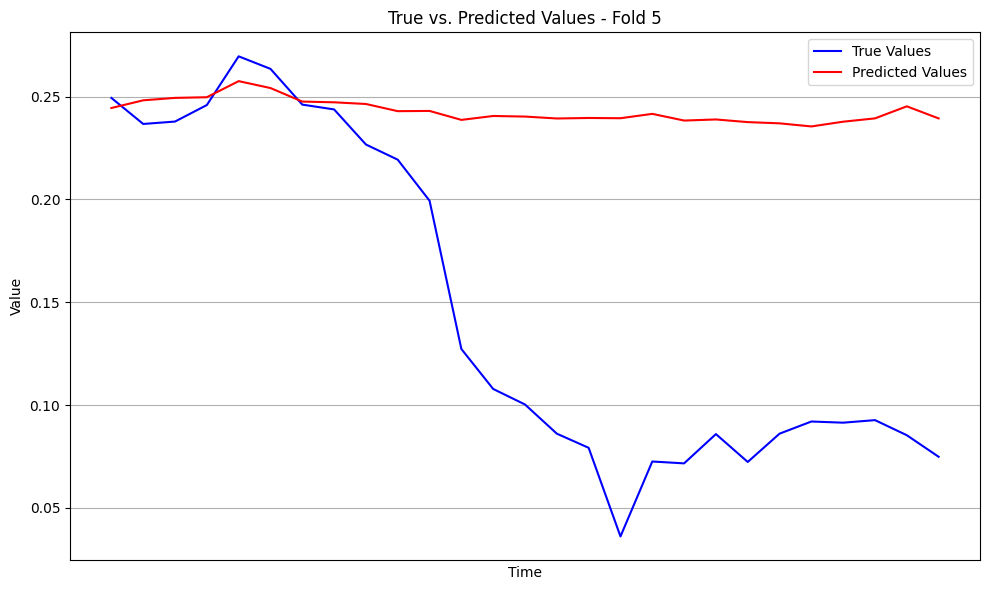

<Figure size 640x480 with 0 Axes>

In [ ]:
#create rolling CV for tabular dataset
gc.collect()
tscv = TimeSeriesSplit(n_splits=5)
#metrics to eval
mae_list, rsme_list, smape_list = [], [], []

#initialising first fold
fold = 1
for train_index, test_index in tscv.split(df):
  train_df, test_df = df.iloc[train_index], df.iloc[test_index]
  train_tabular_df = TabularDataset(train_df)
  test_tabular_df = TabularDataset(test_df)

  predictor = TabularPredictor(label=target).fit(
      train_data=train_tabular_df,
      time_limit=240,  # 4 minutes to match lin reg time
      presets='best_quality',
      hyperparameters='default' #tunes automatically

  )

  y_true = test_tabular_df[target]
  y_pred = predictor.predict(test_tabular_df)

  #metrics
  mae = mean_absolute_error(y_true, y_pred)
  rsme = np.sqrt(mean_squared_error(y_true, y_pred))
  smape = smape_calc(y_true, y_pred)

  #add to list
  mae_list.append(mae)
  rsme_list.append(rsme)
  smape_list.append(smape)

  #create plot
  plt.figure(figsize=(10, 6))
  plt.plot(y_true, label='True Values', color='blue')
  plt.plot(y_pred, label='Predicted Values', color='red')
  plt.title(f'True vs. Predicted Values - Fold {fold}')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
  plt.savefig(f'autogluon_fold_{fold}_df_2.png')

  fold += 1 #do for each fold

In [ ]:
#get results and save
results = pd.DataFrame({
    'Fold': range(1, len(mae_list) + 1),
    'MAE': mae_list,
    'RMSE': rsme_list,
    'sMAPE': smape_list
})
#save
results.to_csv('autogluon_results_df_2.csv', index=False)

In [ ]:
#save best model and leaderboard
best_model_name = predictor.model_best
print(f"Best Model Found by AutoGluon after 4 minutes: {best_model_name}")

#save
with open('autogluon_best_model_df_2.txt', 'w') as f:
  f.write(f"Best Model: {best_model_name}\n")

#also save leaderboard
leaderboard = predictor.leaderboard(test_tabular_df, silent=True)
leaderboard.to_csv('autogluon_leaderboard_df_2.csv', index=False)

Best Model Found by AutoGluon after 4 minutes: WeightedEnsemble_L2


In [ ]:
tracker.stop()
#save the results, models, images and text files
with zipfile.ZipFile('autogluon_emissions.zip', 'w') as zipf:
  zipf.write('autogluon_results_df_1.csv')
  zipf.write('autogluon_results_df_2.csv')
  zipf.write('autogluon_best_model.txt')
  zipf.write('autogluon_best_model_df_2.txt')
  zipf.write('autogluon_leaderboard.csv')
  zipf.write('autogluon_leaderboard_df_2.csv')
  for i in range(1,6):
    zipf.write(f'autogluon_fold_{i}_df_1.png')
    zipf.write(f'autogluon_fold_{i}_df_2.png')
#download
files.download('autogluon_emissions.zip')


[codecarbon INFO @ 01:04:21] Energy consumed for RAM : 0.008008 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 01:04:21] Delta energy consumed for CPU with constant : 0.000036 kWh, power : 42.5 W
[codecarbon INFO @ 01:04:21] Energy consumed for All CPU : 0.034041 kWh
[codecarbon INFO @ 01:04:21] 0.042049 kWh of electricity used since the beginning.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>